In [1]:
import numpy as np
import cv2
import tensorflow as tf 
import matplotlib.pyplot as plt

c:\Users\sashank\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

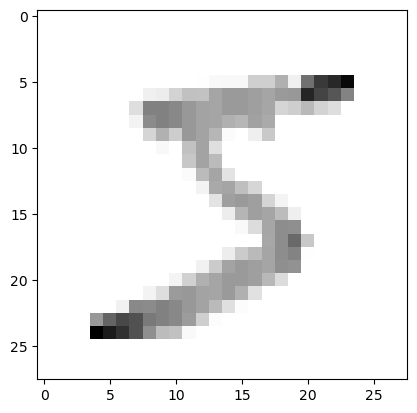

In [5]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [6]:
y_train[0]

5

In [7]:
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)

In [10]:
model=tf.keras.models.Sequential()

In [11]:
#conv layer1
#pooling layer reduces size and keeps only imp pixels
model.add(tf.keras.layers.Conv2D(64,(3,3) ,input_shape=(x_trainr.shape[1:]), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#conv layer 2
model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#conv layer3
model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#fully connected layer1
#flatten layer reduces dimension
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
#layer2
model.add(tf.keras.layers.Dense(32, activation="relu"))
#o/p layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

c:\Users\sashank\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.7730 - loss: 0.6885 - val_accuracy: 0.9589 - val_loss: 0.1326
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9673 - loss: 0.1106 - val_accuracy: 0.9708 - val_loss: 0.0985
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9775 - loss: 0.0759 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9822 - loss: 0.0577 - val_accuracy: 0.9786 - val_loss: 0.0671
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9871 - loss: 0.0410 - val_accuracy: 0.9803 - val_loss: 0.0690


In [17]:
loss, accuracy = model.evaluate(x_testr, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9776 - loss: 0.0743


In [21]:
predictions=model.predict([x_testr])
print(np.argmax(predictions[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
2


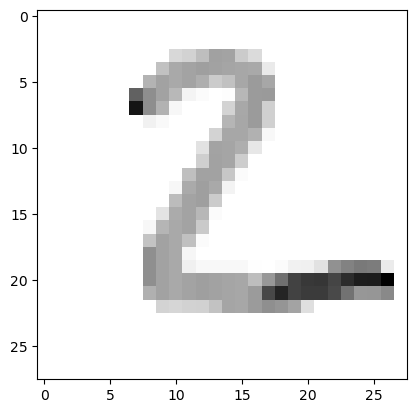

In [20]:
plt.imshow(x_testr[1], cmap = plt.cm.binary)

In [29]:
img=cv2.imread(f"2_2.png")[:,:,0]
img=np.invert(np.array([img]))

<function matplotlib.pyplot.show(close=None, block=None)>

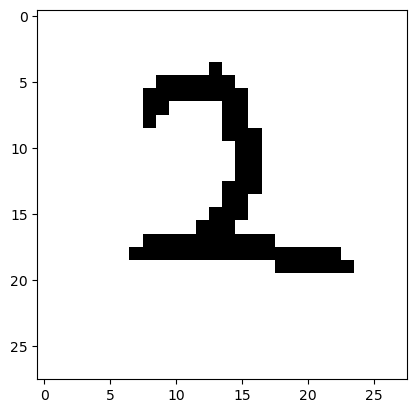

In [30]:
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show

In [31]:
n_img=tf.keras.utils.normalize(img,axis=1)
m_img=np.array(n_img).reshape(-1,img_size,img_size,1)

In [32]:
prediction=model.predict(n_img)
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2
